In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [00:23<00:00, 106MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


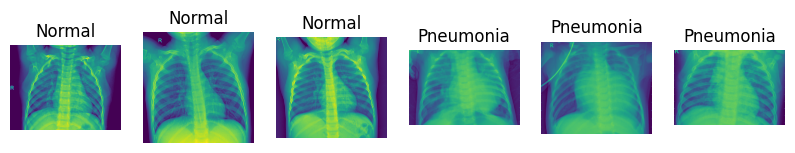

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.7838 - loss: 0.5023 - val_accuracy: 0.6875 - val_loss: 0.5362
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.9027 - loss: 0.2443 - val_accuracy: 0.8125 - val_loss: 0.3348
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 316s 2s/step - accuracy: 0.9142 - loss: 0.2006 - val_accuracy: 0.8125 - val_loss: 0.3629
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 289s 2s/step - accuracy: 0.9231 - loss: 0.1911 - val_accuracy: 0.6875 - val_loss: 0.7546
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 290s 2s/step - accuracy: 0.9428 - loss: 0.1499 - val_accuracy: 0.6875 - val_loss: 0.5843
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 294s 2s/step - accuracy: 0.9441 - loss: 0.1441 - val_accuracy: 0.6875 - val_loss: 0.7647
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9516 - loss: 0.1275 - val_accuracy: 0.6250 - val_loss: 1.5009
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.9535 - loss: 0.1203 - val_accuracy: 0.625

In [ ]:

# prompt: generate me a code for the phemonia detection in chest generate the kaggle dataset path and visuals to the code using CNN and learning rate  not a mount drive upload file

import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

# Define image dimensions and batch size
IMG_WIDTH, IMG_HEIGHT = 150, 150
BATCH_SIZE = 32

# Data paths
train_dir = os.path.join(path, 'chest_xray', 'train')
test_dir = os.path.join(path, 'chest_xray', 'test')
val_dir = os.path.join(path, 'chest_xray', 'val')

# Example image visualization
def plot_images(img_paths, labels):
    plt.figure(figsize=(10, 10))
    for i in range(len(img_paths)):
        img = Image.open(img_paths[i])
        plt.subplot(1, len(img_paths), i + 1)
        plt.imshow(img)
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Sample images
normal_imgs = [os.path.join(train_dir, 'NORMAL', img) for img in os.listdir(os.path.join(train_dir, 'NORMAL'))][:3]
pneumonia_imgs = [os.path.join(train_dir, 'PNEUMONIA', img) for img in os.listdir(os.path.join(train_dir, 'PNEUMONIA'))][:3]
plot_images(normal_imgs + pneumonia_imgs, ['Normal']*3 + ['Pneumonia']*3)


# Data generators
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


# Compile the model
learning_rate = 0.001  # Example learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=validation_generator)


Trail-2


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


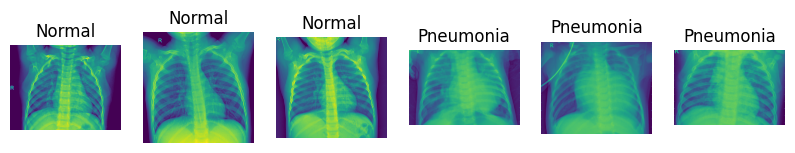

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.7389 - loss: 0.5659 - val_accuracy: 0.8750 - val_loss: 0.5937
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 298s 2s/step - accuracy: 0.8981 - loss: 0.2406 - val_accuracy: 0.8750 - val_loss: 0.5252
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.9152 - loss: 0.2077 - val_accuracy: 0.7500 - val_loss: 0.5276
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.9267 - loss: 0.1825 - val_accuracy: 0.5625 - val_loss: 1.2512
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9343 - loss: 0.1634 - val_accuracy: 0.8750 - val_loss: 0.3326
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.9362 - loss: 0.1645 - val_accuracy: 0.8750 - val_loss: 0.2879
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 291s 2s/step - accuracy: 0.9498 - loss: 0.1447 - val_accuracy: 0.7500 - val_loss: 0.5241
Epoch 8/10
163/

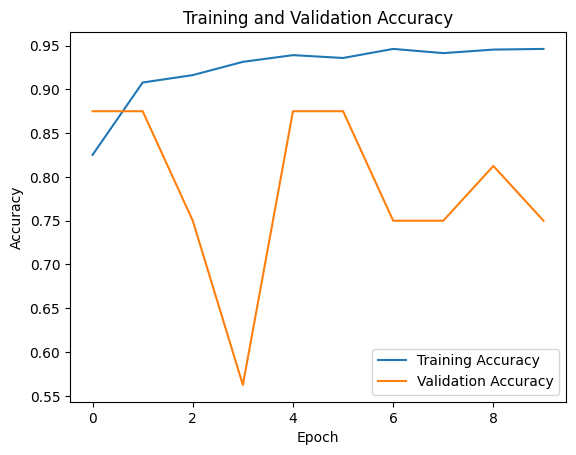

1/1 - 0s - 303ms/step - accuracy: 0.7500 - loss: 0.6384

Test accuracy:


In [5]:
import kagglehub
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)

# Image dimensions and batch size
IMG_WIDTH, IMG_HEIGHT = 150, 150
BATCH_SIZE = 32

# Data paths
train_dir = os.path.join(path, 'chest_xray', 'train')
test_dir = os.path.join(path, 'chest_xray', 'test')
val_dir = os.path.join(path, 'chest_xray', 'val')

# Function to visualize images
def plot_images(img_paths, labels):
    plt.figure(figsize=(10, 10))
    for i in range(len(img_paths)):
        img = Image.open(img_paths[i])
        plt.subplot(1, len(img_paths), i + 1)
        plt.imshow(img)
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Display sample images
normal_imgs = [os.path.join(train_dir, 'NORMAL', img) for img in os.listdir(os.path.join(train_dir, 'NORMAL'))][:3]
pneumonia_imgs = [os.path.join(train_dir, 'PNEUMONIA', img) for img in os.listdir(os.path.join(train_dir, 'PNEUMONIA'))][:3]
plot_images(normal_imgs + pneumonia_imgs, ['Normal']*3 + ['Pneumonia']*3)

# Data augmentation and generators
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_WIDTH, IMG_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
learning_rate = 0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and store history
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on test data and print accuracy
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:',)

In [6]:
# Evaluate on test data and print accuracy
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('\nTest accuracy:',test_acc)

1/1 - 0s - 312ms/step - accuracy: 0.7500 - loss: 0.6384

Test accuracy: 0.75
